# 📊 Student Data Analysis
In this notebook, we'll explore a dataset with information about students.  
We'll use Python libraries like **pandas**, **seaborn**, and **matplotlib** to analyze and visualize the data.

We are getting data from a custom Json-file found in "Data" folder called: "Json_Data.json".

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# 📥 Load JSON Data
We have student data in a JSON file, containing details like names, emails, ages, and courses. To work with this data, we load it into a pandas DataFrame for easier manipulation and analysis.

The load_json(filepath) function loads and flattens the JSON data:

Open the File: It opens the JSON file and loads the data using json.load().

Flatten Data: The data is flattened with pd.json_normalize() to convert nested structures into a table.

Return Data: It returns the data as a pandas DataFrame for easy analysis.

In [61]:
# For loading the JSON data (custom module)
def load_json(filepath):
    """
    Loads the JSON data from the given file path and returns it as a pandas DataFrame.
    """
    with open(filepath, 'r') as file:
        data = json.load(file)

    df = pd.json_normalize(data)
    return df


# Load the data from JSON file
df = load_json('../../Data/Json_data.json')

# Show the first 5 rows
df.head()

,id,name,email,age,gender,courses,active,grades.math,grades.english,grades.science
0,101,Emma Nielsen,emma.nielsen@example.com,21,Female,"[Math, English, Science]",True,88,92,85
1,102,Lucas Hansen,lucas.hansen@example.com,24,Male,"[Math, Science]",False,76,70,80
2,103,Ida Sørensen,ida.sorensen@example.com,22,Female,"[English, Science]",True,95,98,90
3,104,Noah Jensen,noah.jensen@example.com,23,Male,"[Math, English]",False,60,65,58
4,105,Freja Madsen,freja.madsen@example.com,20,Female,"[Math, English, Science]",True,89,91,87


## 📁 Create 'Visuals' Folder
We want to save our graphs as image files.  
To keep things organized, we’ll save them in a folder called `Visuals`.

The code below checks if the folder exists — if not, it creates it.

In [62]:
# Make sure the folder exists for saving graphs
if not os.path.exists('../../Visuals'):
    os.makedirs('../../Visuals')

## 📊 Age Distribution
We’ll use a bar plot to show the count of students for each age

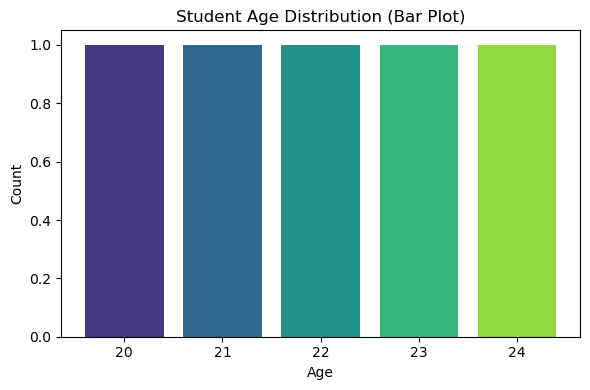

In [63]:
# Count the number of students in each unique age group
age_counts = df['age'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(6,4))

# Use barplot, but explicitly pass the correct arguments without 'hue'
plt.bar(age_counts.index, age_counts.values, color=sns.color_palette('viridis', len(age_counts.index)))

plt.title('Student Age Distribution (Bar Plot)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()

# Save the plot
plt.savefig('../../Visuals/age_distribution_simple.png')

# Show the plot
plt.show()


## Active vs Inactive Students

Next, we will create a visualization to compare the number of active vs inactive students. This will help us see how many students are currently engaged with their studies.


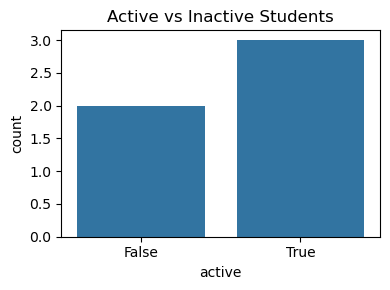

In [64]:
# 2. Active vs Inactive Students (Simple Countplot)
plt.figure(figsize=(4,3))
sns.countplot(x='active', data=df)
plt.title('Active vs Inactive Students')
plt.tight_layout()
plt.savefig('../../Visuals/active_status.png')
plt.show()


## Conclusion

We have successfully visualized the following:

- The distribution of student ages using a simple bar plot.
- The comparison of active vs inactive students using a count plot.

These visualizations help provide insights into the dataset, making it easier to understand the characteristics of the students.